# 2. Histogram Processing

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

1. Histogram Equalization

size : [512, 512]


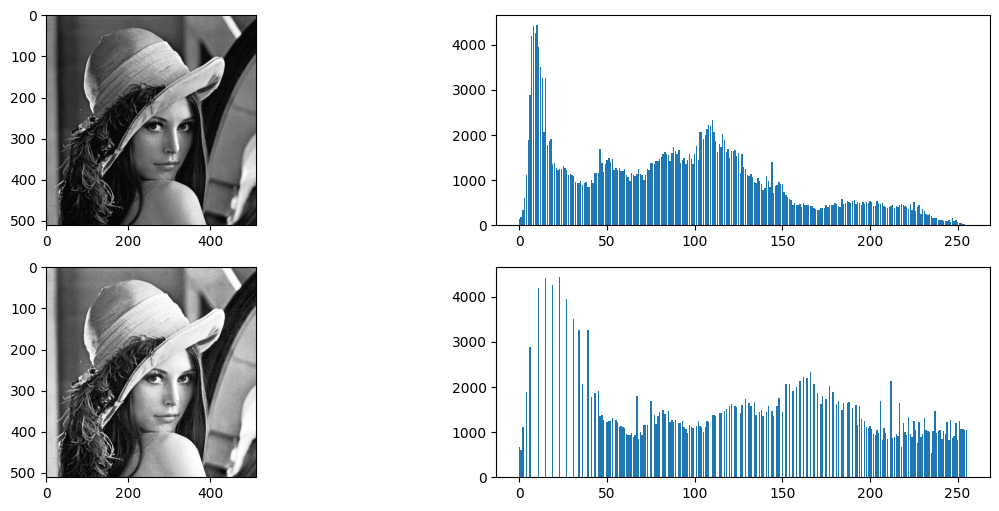

In [93]:
# Initialize
img = cv2.imread('images/01-lena-gray.png', cv2.IMREAD_GRAYSCALE)
hist = cv2.calcHist([img], [0], None, [256], [0, 256])
print(f'size : [{len(img)}, {len(img[0])}]')

# Equalize
table_eq = np.uint8(np.floor(hist.cumsum() * 256 / (512 * 512)))
img_eq = cv2.LUT(img, table_eq.ravel())
hist_eq = cv2.calcHist([img_eq], [0], None, [256], [0, 256])

# Plot
plt.figure(figsize=(14, 6))
plt.subplot(2, 2, 1)
plt.imshow(img, cmap='gray')
plt.subplot(2, 2, 2)
plt.bar(range(len(hist)), hist.ravel())
plt.subplot(2, 2, 3)
plt.imshow(img_eq, cmap='gray')
plt.subplot(2, 2, 4)
plt.bar(range(len(hist_eq)), hist_eq.ravel())
plt.show()

2. Histogram Equalization of Color Image

size : [512, 512]


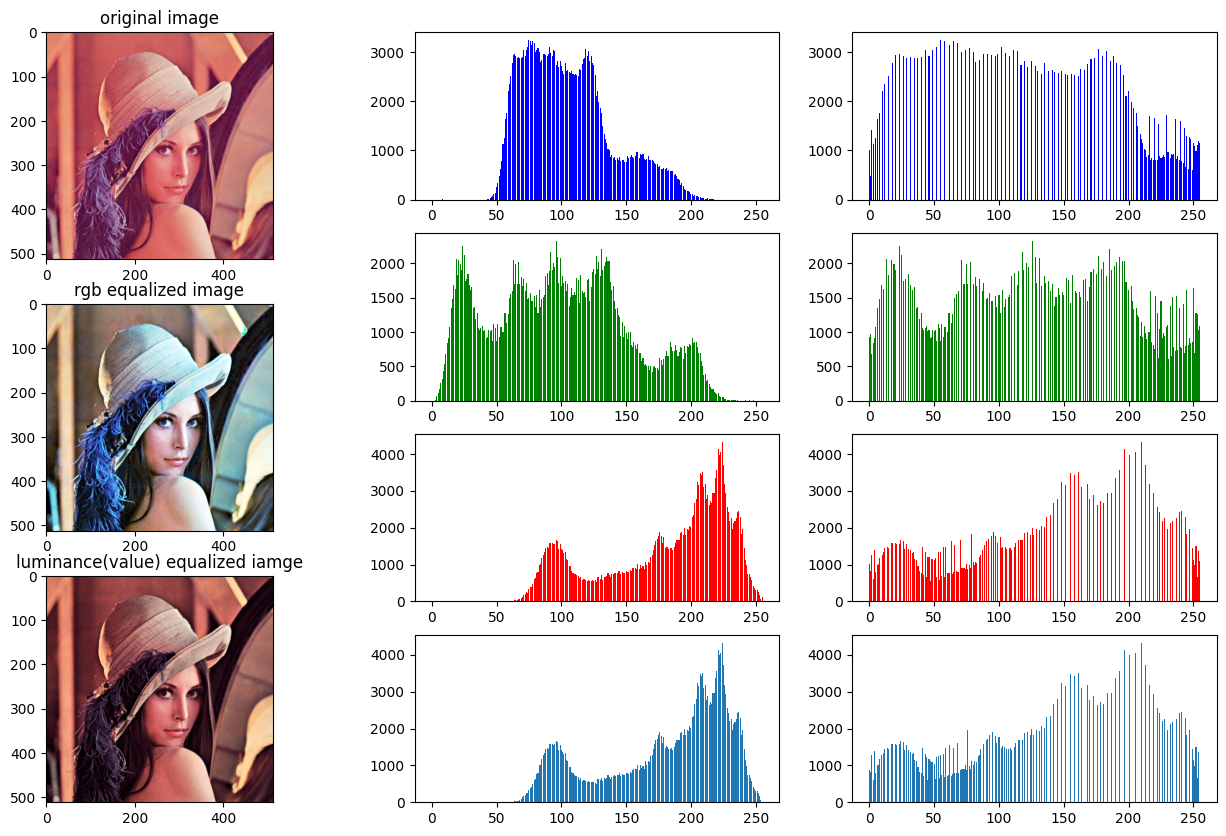

In [119]:
# Initializze
img = cv2.imread('images/01-lena-color.png', cv2.IMREAD_COLOR)
colors = ('b', 'g', 'r')
hist = {}
table_eq = {}
img_eq = {}
hist_eq = {}

# RGB equalization
for i, color in enumerate(colors):
    hist[color] = cv2.calcHist([img], [i], None, [256], [0, 256])
    table_eq[color] = np.uint8(np.floor(hist[color].cumsum() * 256 / (512 * 512)))
table_eq = cv2.merge([table_eq['b'], table_eq['g'], table_eq['r']])

img_eq = cv2.LUT(img, table_eq)
for i, color in enumerate(colors):
    hist_eq[color] = cv2.calcHist([img_eq], [i], None, [256], [0, 256])
print(f'size : [{len(img)}, {len(img[0])}]')

# Luminance(Value) equalization
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
hist_v = cv2.calcHist([img_hsv], [2], None, [256], [0, 255])
table_v = np.uint8(np.floor(hist_v.cumsum() * 256 / (512 * 512)))
table_lum_eq = cv2.merge([np.uint8(np.arange(256)), np.uint8(np.arange(256)), table_v])
img_lum_eq = cv2.LUT(img_hsv, table_lum_eq)
hist_lum = cv2.calcHist([img_lum_eq], [2], None, [256], [0, 255])

# Plot
plt.figure(figsize=(16, 10))
plt.subplot(3, 3, 1)
plt.title('original image')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.subplot(3, 3, 4)
plt.title('rgb equalized image')
plt.imshow(cv2.cvtColor(img_eq, cv2.COLOR_BGR2RGB))
plt.subplot(3, 3, 7)
plt.title('luminance(value) equalized iamge')
plt.imshow(cv2.cvtColor(img_lum_eq, cv2.COLOR_HSV2RGB))

for i, color in enumerate(colors):
    plt.subplot(4, 3, 2 + i * 3)
    plt.bar(range(len(hist[color])), hist[color].ravel(), color=color)

for i, color in enumerate(colors):
    plt.subplot(4, 3, 3 + i * 3)
    plt.bar(range(len(hist_eq[color])), hist_eq[color].ravel(), color=color)

plt.subplot(4, 3, 11)
plt.bar(range(len(hist_v)), hist_v.ravel())
plt.subplot(4, 3, 12)
plt.bar(range(len(hist_lum)), hist_lum.ravel())

plt.show()

3. Histogram Specification

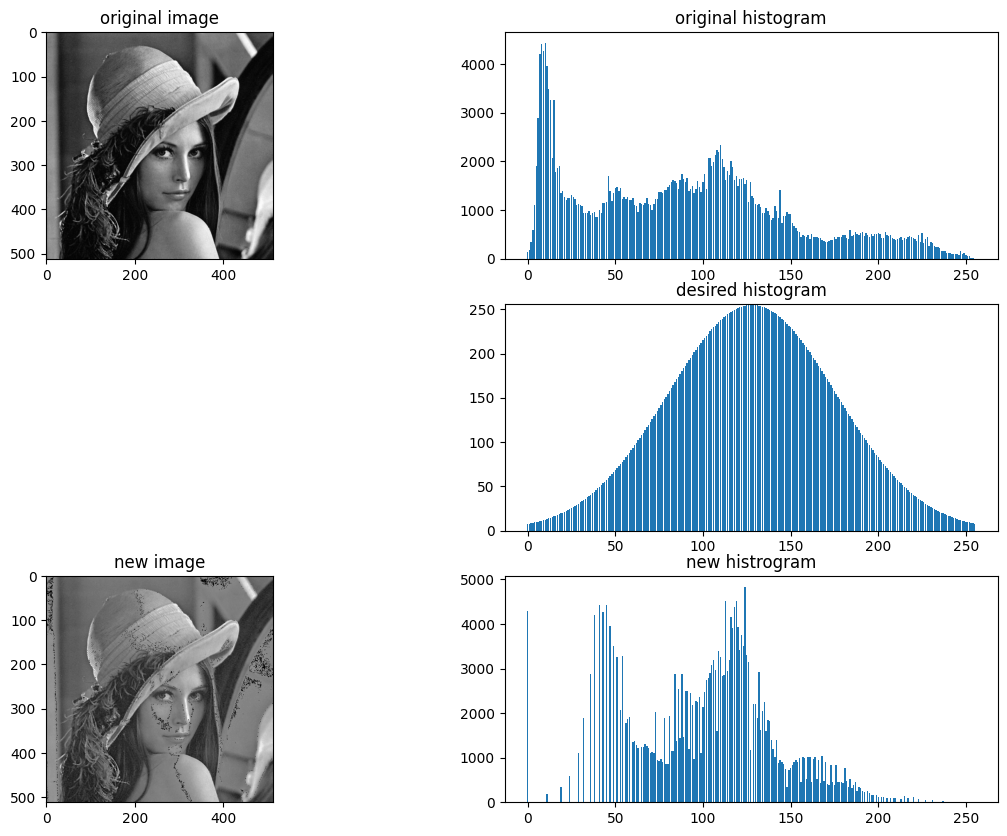

In [197]:
# Initialize
img = cv2.imread('images/01-lena-gray.png', cv2.IMREAD_GRAYSCALE)
hist = cv2.calcHist([img], [0], None, [256], [0, 256])

mean = 128
std_dev = 48

x = np.arange(256)
pdf = np.exp(-0.5 * np.power((x - mean) / std_dev, 2)) / (std_dev * np.sqrt(2 * np.pi))
desired = (pdf / np.max(pdf)) * 255

# Specify
sum_desired = np.uint8(desired.cumsum() * 255 / np.sum(desired))

table_specified = np.zeros(256)
for i in range(256):
    difference = abs(i - sum_desired[i])
    min = 0
    for j in range(256):
        if abs(i - sum_desired[j]) < difference:
            difference = abs(i - sum_desired[j])
            min = j
    table_specified[i] = min

img_new = cv2.LUT(img, np.uint8(table_specified))
hist_specified = cv2.calcHist([img_new], [0], None, [256], [0, 256])

# Plot
plt.figure(figsize=(14, 10))
plt.subplot(3, 2, 1)
plt.title('original image')
plt.imshow(img, cmap='gray')
plt.subplot(3, 2, 5)
plt.title('new image')
plt.imshow(img_new, cmap='gray')

plt.subplot(3, 2, 2)
plt.title('original histogram')
plt.bar(range(len(hist)), hist.ravel())
plt.subplot(3, 2, 4)
plt.title('desired histogram')
plt.bar(x, desired)
plt.ylim(0, 256)
plt.subplot(3, 2, 6)
plt.title('new histrogram')
plt.bar(range(len(hist_specified)), hist_specified.ravel())

plt.show()